In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cmo
import seaborn as sb

In [2]:
experiment = ["CM4", "ESM4"]
var = ["hfds", "dic_stf_gas"]
path = {"CM4": "/work/Katherine.Turner/tempest-extremes/odiv-251/comp_",
        "ESM4": "/work/Katherine.Turner/tempest-extremes/ESM4/"}
lim = {"hfds": 45,
      "dic_stf_gas": 3e-8}

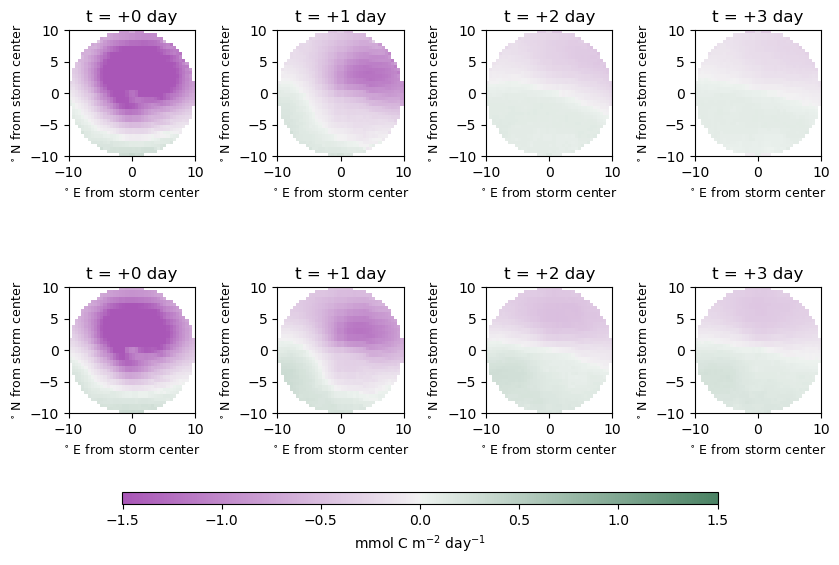

In [121]:
v = 'dic_stf_gas'

f = f"{path['CM4']}{v}/comp_{v}_anom_static.nc"
ds_CM4 = xr.open_dataset(f, use_cftime=True)

f = f"{path['ESM4']}{v}/comp_{v}_anom_static.nc"
ds_ESM4 = xr.open_dataset(f, use_cftime=True)

X = np.meshgrid(ds.x.data,ds.y.data)
mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])

lag = [0,1,2,3]

fig, axs = plt.subplots(ncols=4, nrows=2, figsize = (8.5,6))
axs=axs.flatten()
for i, l in enumerate(lag):
    x = ds_CM4[f'snap_{v}_anom'][l::11,:,:]
    x = xr.where(mask, x, np.nan)
    x = xr.where(x < 1e10, x, np.nan)
    (1e3*24*60**2*x).mean('snapshot').plot(ax=axs[i], y='y', vmin=-1.5, vmax=1.5, 
                                           cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
                                           extend="neither",
                                           add_colorbar=False)
    axs[i].set_title(f't = +{l} day')
    
    y = ds_ESM4[f'snap_{v}_anom'][l::11,:,:]
    y = xr.where(mask, y, np.nan)
    im = (1e3*24*60**2*y).mean('snapshot').plot(ax=axs[i+4], y='y', vmin=-1.5, vmax=1.5,
                                                cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True),
                                                extend="neither",
                                                add_colorbar=False)
    axs[i+4].set_title(f't = +{l} day')
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.10, 0.7, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='mmol C m$^{-2}$ day$^{-1}$')
    
for i in range(8):
    axs[i].set_aspect(1)
    axs[i].set_xlabel('$^{\circ}$ E from storm center', fontsize=9)
    axs[i].set_ylabel('$^{\circ}$ N from storm center', fontsize=9)

plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/GFDL_poststorm_fluxes_carbon.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/composite_fluxes/GFDL_poststorm_fluxes_carbon.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/GFDL_poststorm_fluxes_carbon.eps",
           format="eps")

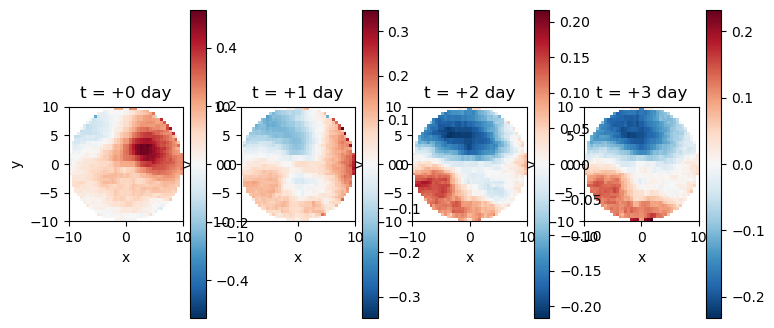

In [122]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize = (8.5,4))
axs=axs.flatten()
for i, l in enumerate(lag):
    x = ds_CM4[f'snap_{v}_anom'][l::11,:,:]
    x = xr.where(mask, x, np.nan)
    x = xr.where(x < 1e10, x, np.nan)
    
    y = ds_ESM4[f'snap_{v}_anom'][l::11,:,:]
    y = xr.where(mask, y, np.nan)
    im = (1e3*24*60**2*(y.mean('snapshot') - x.mean('snapshot'))).plot(ax=axs[i], y='y')#, vmin=-8, vmax=8, cmap="RdBu_r", extend="neither",
                                #add_colorbar=False)
    axs[i].set_title(f't = +{l} day')
    axs[i].set_aspect(1)

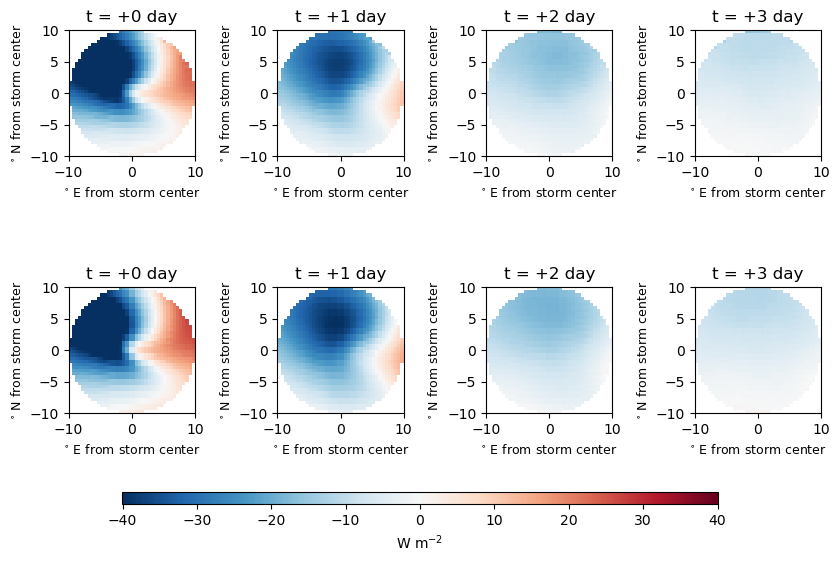

In [117]:
v = 'hfds'

f = f"{path['CM4']}{v}/comp_{v}_anom_static.nc"
ds_CM4 = xr.open_dataset(f, use_cftime=True)

f = f"{path['ESM4']}{v}/comp_{v}_anom_static.nc"
ds_ESM4 = xr.open_dataset(f, use_cftime=True)

X = np.meshgrid(ds.x.data,ds.y.data)
mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])

lag = [0, 1, 2, 3]

fig, axs = plt.subplots(ncols=4, nrows=2, figsize = (8.5,6))
axs=axs.flatten()
for i, l in enumerate(lag):
    x = ds_CM4[f'snap_{v}_anom'][l::11,:,:]
    x = xr.where(mask, x, np.nan)
    x = xr.where(x < 1e10, x, np.nan)
    x.mean('snapshot').plot(ax=axs[i], y='y', vmin=-40, vmax=40, cmap="RdBu_r", extend="neither",
                           add_colorbar=False)
    axs[i].set_title(f't = +{l} day')
    
    y = ds_ESM4[f'snap_{v}_anom'][l::11,:,:]
    y = xr.where(mask, y, np.nan)
    im = y.mean('snapshot').plot(ax=axs[i+4], y='y', vmin=-40, vmax=40, cmap="RdBu_r", extend="neither",
                                add_colorbar=False)
    axs[i+4].set_title(f't = +{l} day')
    
plt.tight_layout()
fig.subplots_adjust(bottom=0.2)
cbar_ax = fig.add_axes([0.15, 0.10, 0.7, 0.02])
fig.colorbar(im, cax=cbar_ax, orientation="horizontal",
            label='W m$^{-2}$')
    
for i in range(8):
    axs[i].set_aspect(1)
    axs[i].set_xlabel('$^{\circ}$ E from storm center', fontsize=9)
    axs[i].set_ylabel('$^{\circ}$ N from storm center', fontsize=9)

plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/GFDL_poststorm_fluxes_heat.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/composite_fluxes/GFDL_poststorm_fluxes_heat.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/GFDL_poststorm_fluxes_heat.eps",
           format="eps")

In [75]:
def create_response_matrix(exp, v):
    f = f"{path[exp]}{v}/comp_{v}_anom_static.nc"

    ds = xr.open_dataset(f, use_cftime=True)
    X = np.meshgrid(ds.x.data,ds.y.data)
    mask = xr.DataArray(np.sqrt(X[0]**2 + X[1]**2) <= 10, dims=['x', 'y'])

    storm_date = ds.snap_time[::11]

    response_matrix = np.ones(shape=[12,11])

    for i_month, month in enumerate(range(1,13)):
        idx_month = storm_date.dt.month == month
        for i_lag in range(0,11):
            comp_lag = ds[f'snap_{v}_anom'][i_lag::11,:,:]
        
            comp_lag_month = xr.where(mask, comp_lag[idx_month,:,:], np.nan)
            comp_lag_month = xr.where(abs(comp_lag_month)>1e10, np.nan, comp_lag_month)
        
            response_matrix[i_month, i_lag] = comp_lag_month.mean(dim='snapshot').mean(dim=['x','y']).data
    
    return response_matrix

In [76]:
CM4_hfds_resp = create_response_matrix('CM4', 'hfds')
CM4_carb_resp = create_response_matrix('CM4', 'dic_stf_gas')
ESM4_hfds_resp = create_response_matrix('ESM4', 'hfds')
ESM4_carb_resp = create_response_matrix('ESM4', 'dic_stf_gas')

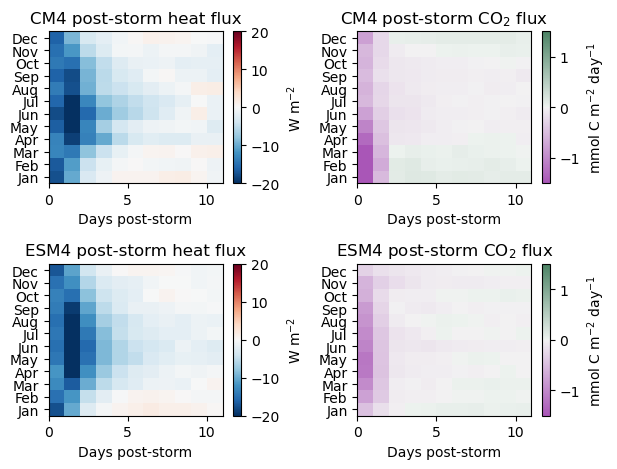

In [84]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs=axs.flatten()

f = axs[0].pcolormesh(CM4_hfds_resp, vmin=-20, vmax=20, cmap="RdBu_r")
plt.colorbar(f, ax=axs[0], label='W m$^{-2}$')
axs[0].set_title('CM4 post-storm heat flux')

f = axs[1].pcolormesh(1e3*60**2*24*CM4_carb_resp, vmin=-1.5, vmax=1.5,
                     cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True))
plt.colorbar(f, ax=axs[1], label = 'mmol C m$^{-2}$ day$^{-1}$')
axs[1].set_title('CM4 post-storm CO$_2$ flux')

f = axs[2].pcolormesh(ESM4_hfds_resp, vmin=-20, vmax=20, cmap="RdBu_r")
plt.colorbar(f, ax=axs[2], label='W m$^{-2}$')
axs[2].set_title('ESM4 post-storm heat flux')

f = axs[3].pcolormesh(1e3*60**2*24*ESM4_carb_resp, vmin=-1.5, vmax=1.5,
                     cmap=sb.diverging_palette(300, 145, s=60, as_cmap=True))
plt.colorbar(f, ax=axs[3], label = 'mmol C m$^{-2}$ day$^{-1}$')
axs[3].set_title('ESM4 post-storm CO$_2$ flux')

for i in range(4):
    axs[i].set_xlabel('Days post-storm')
    axs[i].set_yticks(ticks = np.arange(0.5,12.5), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                                                'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
plt.tight_layout()

plt.savefig("/work/Katherine.Turner/CM4_storms/analysis_figures/GFDL_poststorm_fluxes_monthly.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/Figures/tempest-extremes/composite_fluxes/GFDL_poststorm_fluxes_monthly.png",
           format="png",
           dpi=100,
           bbox_inches="tight")
plt.savefig("/home/Katherine.Turner/GFDL_poststorm_fluxes_monthly.eps",
           format="eps")